In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'

-rw------- 1 root root 12929865 Mar  9 02:39 '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'


In [ ]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Logo_Data.zip

In [5]:
train_dir='train'
valid_dir='test'
test_dir = 'test'

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale= 1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, 
                                   fill_mode='nearest') 
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(75,75), batch_size=8, class_mode='categorical')
valid_generator = valid_datagen.flow_from_directory(valid_dir, target_size=(75,75), batch_size=8, class_mode='categorical')

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.


In [8]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (75, 75, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(27, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [11]:
%%time
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
Hist = model.fit(train_generator, steps_per_epoch=62, epochs=200, validation_data=valid_generator, validation_steps=22)

Epoch 1/200
62/62 [==============================] - 34s 32ms/step - loss: 3.3641 - accuracy: 0.0275 - val_loss: 3.2787 - val_accuracy: 0.0341
Epoch 2/200
62/62 [==============================] - 2s 26ms/step - loss: 3.2484 - accuracy: 0.0763 - val_loss: 3.1453 - val_accuracy: 0.0568
Epoch 3/200
62/62 [==============================] - 2s 26ms/step - loss: 3.0887 - accuracy: 0.1257 - val_loss: 3.0869 - val_accuracy: 0.0852
Epoch 4/200
62/62 [==============================] - 2s 27ms/step - loss: 2.9623 - accuracy: 0.1379 - val_loss: 2.9801 - val_accuracy: 0.1023
Epoch 5/200
62/62 [==============================] - 2s 26ms/step - loss: 2.8494 - accuracy: 0.1447 - val_loss: 2.9574 - val_accuracy: 0.1080
Epoch 6/200
62/62 [==============================] - 2s 27ms/step - loss: 2.7772 - accuracy: 0.2051 - val_loss: 3.0257 - val_accuracy: 0.1420
Epoch 7/200
62/62 [==============================] - 2s 26ms/step - loss: 2.7085 - accuracy: 0.1733 - val_loss: 2.8547 - val_accuracy: 0.1932
Epoch

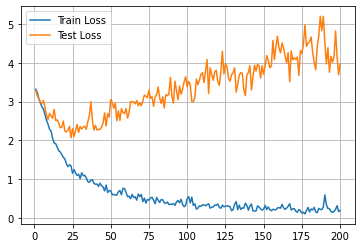

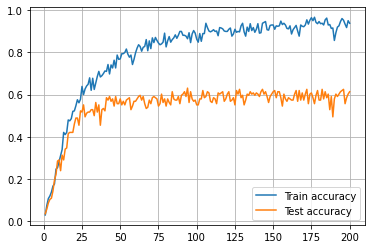

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)

plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['Train Loss', 'Test Loss'])
plt.grid()
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['Train accuracy', 'Test accuracy'])
plt.grid()
plt.show()

In [13]:
test_datagen= ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(75,75), batch_size=8, class_mode='categorical')
loss, accuracy = model.evaluate(test_generator, steps=22)
loss, accuracy

Found 177 images belonging to 27 classes.
22/22 [==============================] - 0s 10ms/step - loss: 3.9683 - accuracy: 0.6136


(3.9683456420898438, 0.6136363744735718)